# Proyect

## imports

### data preparation


In [2]:
import os

### model

In [3]:
from tensorflow.keras.utils import image_dataset_from_directory as img_ds
import tensorflow as tf
from  tensorflow import keras as ks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Rescaling
from tensorflow.keras.layers import Dropout, Flatten, Dense

### evaluation

In [4]:
from sklearn.metrics import confusion_matrix as cm

### visualizations


In [5]:
from matplotlib import pyplot as plt
import numpy as np

### model visualizations

In [58]:
import visualkeras

## Code

### data

In [7]:
path_dataset = 'cat_dog_dataset'

classes = os.listdir(path_dataset)
classes.sort()
num_classes = len(classes) # use in other cells
print(f'classes ({num_classes}):')
i = 1
for name in classes:
    print(i,name)
    i += 1

classes (2):
1 cat
2 dog


### Model

#### hyperparameters

In [11]:
# model struture
img_size = (180, 180)
img_shape = (180, 180, 3)
batch_size = 64
modelFileName = 'classifier01.h5'

# model traning
num_epochs = 5

#### data preparation

In [18]:
print('spliting data...')

print('Creating traning dataset...')
train_ds = img_ds(
        path_dataset,
        validation_split = 0.3,
        subset = 'training',
        seed = 123,
        image_size = img_size,
        batch_size = batch_size
    )

print('Creating test dataset...')
val_ds = img_ds(
        path_dataset,
        validation_split = 0.3,
        subset = 'validation',
        seed = 123,
        image_size = img_size,
        batch_size = batch_size
    )


class_names = train_ds.class_names
print('done.')


AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

spliting data...
Creating traning dataset...
Found 30577 files belonging to 2 classes.
Using 21404 files for training.
Creating test dataset...
Found 30577 files belonging to 2 classes.
Using 9173 files for validation.
done.


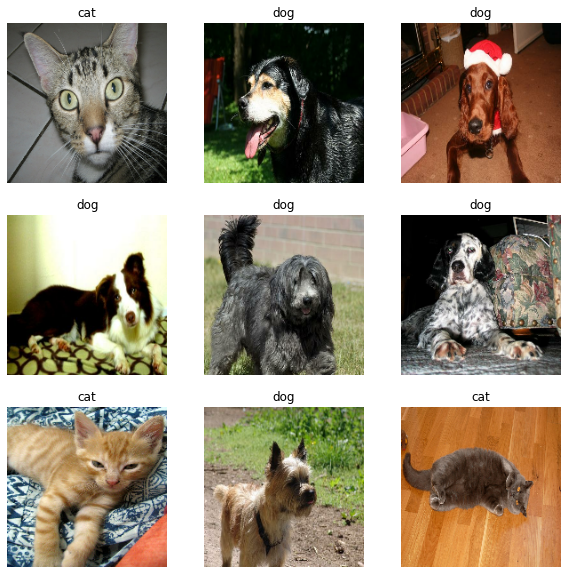

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
      for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[labels[i]])
            plt.axis("off")

#### Structure

In [10]:
model = Sequential()

model.add(
    Rescaling(
        1./225,
        input_shape = img_shape
    )
)

model.add(
    Conv2D(
        32,
        (3, 3),
        input_shape = img_shape,
        activation = 'relu'
    )
)

model.add(
    MaxPooling2D(
        pool_size = (3, 3)
    )
)

model.add(
    Conv2D(
        32,
        (3, 3),
        activation = 'relu'
    )
)

model.add(
    MaxPooling2D(
        pool_size = (3, 3)
    )
)

model.add(
    Conv2D(
        32,
        (3, 3),
        activation = 'relu'
    )
)

model.add(
    MaxPooling2D(
        pool_size = (3, 3)
    )
)

model.add(
    Dropout(0.2)
)

model.add(
    Flatten()
)

model.add(
    Dense(
        num_classes,
        activation = 'softmax'
    )
)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)



print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 19, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 32)        9

#### traning

In [11]:
history = model.fit(
        train_ds,
        validation_data = val_ds,
        epochs = num_epochs
    )

Epoch 1/5
335/335 [==============================] - 3404s 10s/step - loss: 0.5742 - accuracy: 0.7135 - val_loss: 0.5379 - val_accuracy: 0.7398
Epoch 2/5
335/335 [==============================] - 1603s 5s/step - loss: 0.4953 - accuracy: 0.7684 - val_loss: 0.5302 - val_accuracy: 0.7336
Epoch 3/5
335/335 [==============================] - 1960s 6s/step - loss: 0.4558 - accuracy: 0.7944 - val_loss: 0.4795 - val_accuracy: 0.7741
Epoch 4/5
335/335 [==============================] - 1866s 6s/step - loss: 0.4169 - accuracy: 0.8161 - val_loss: 0.4583 - val_accuracy: 0.7862
Epoch 5/5
335/335 [==============================] - 1752s 5s/step - loss: 0.3552 - accuracy: 0.8500 - val_loss: 0.3058 - val_accuracy: 0.8760


graphs

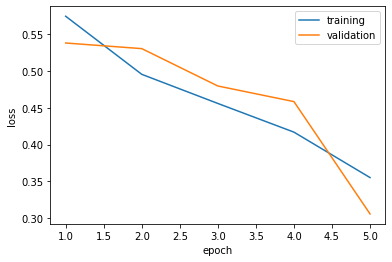

In [12]:
epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

#### versions

In [13]:
print('TensorFlow version:',tf.__version__)
print('Keras version:',ks.__version__)

TensorFlow version: 2.10.0
Keras version: 2.10.0


### evalutaion

In [14]:
model.save(modelFileName)
#del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as classifier01.h5


Generating predictions from validation data...
144/144 [==============================] - 39s 269ms/step


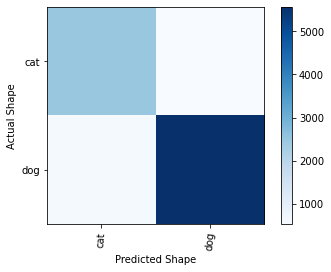

In [55]:
model = ks.models.load_model(modelFileName)

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
y_test = np.array([])

y_test = np.concatenate([y for x, y in val_ds], axis=0)

# Use the model to predict the class
class_probabilities = model.predict(val_ds)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = y_test

# Plot the confusion matrix
cm = cm(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=85)
plt.yticks(tick_marks, class_names)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

[[[158 158 158]
  [129 129 129]
  [139 139 139]
  ...
  [ 49  49  49]
  [ 48  48  48]
  [  8   8   8]]

 [[172 173 173]
  [175 174 174]
  [173 175 175]
  ...
  [153 153 153]
  [160 152 152]
  [149  33 150]]

 [[113 113 113]
  [116 116 116]
  [113 113 113]
  ...
  [ 30  30 115]
  [ 24  24  24]
  [ 18  18  19]]

 ...

 [[179 179 179]
  [ 83 179 179]
  [153 179 179]
  ...
  [  1   1   1]
  [  0   0   6]
  [ 98   1  98]]

 [[ 55  51  51]
  [ 79  57  57]
  [ 79  79  57]
  ...
  [ 46  47  47]
  [ 46  46  46]
  [ 46  46  46]]

 [[ 56  56 122]
  [ 56  56 121]
  [ 60  60 121]
  ...
  [ 35  35  36]
  [ 35  35  36]
  [ 35  35  35]]]
[1. 1. 1. ... 0. 1. 1.]


### model visualisation

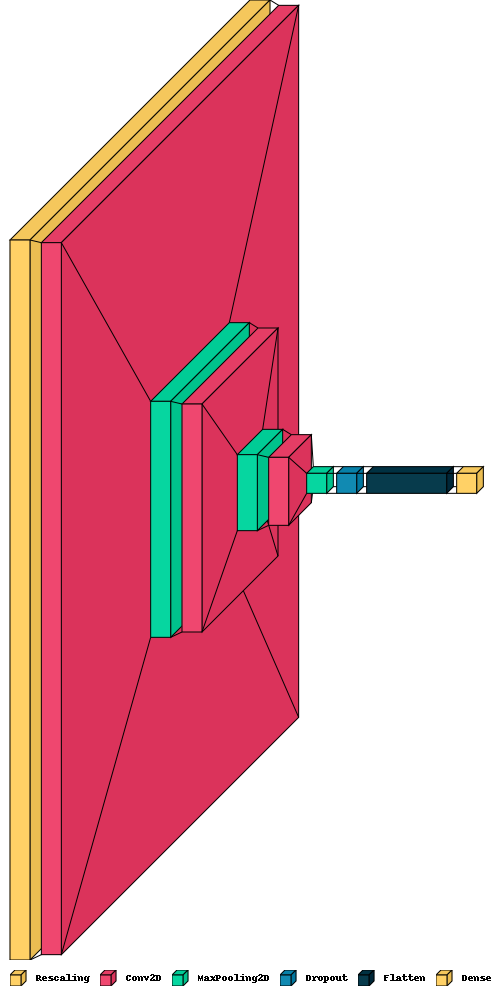

In [59]:
visualkeras.layered_view(model, legend=True)